In [1]:
#@title Initialize environment

#@markdown We recommend setting up a working directory on your google drive. This is a 
#@markdown convenient way to pass files in and out of this analysis. It will 
#@markdown also allow you to save your work. If you put `biophysics` into the form
#@markdown field below, the analyis will save all of its calculations in the 
#@markdown `biophysics` directory in MyDrive (i.e. the top directory at
#@markdown https://drive.google.com). This script will create the directory if 
#@markdown it does not already exist. If the directory already exists, any files
#@markdown that are already in that directory will be available for the analysis. 
#@markdown You could, for example, put a file called `data.csv` in `biophysics` and then
#@markdown access it as "data.csv" in all cells below.
#@markdown <br/>
#@markdown Note: Google may prompt you for permission to access the drive. 
#@markdown To work in a temporary colab environment, leave this blank. Your results
#@markdown will disappear when you close the directory. 

try:
    import google.colab
    RUNNING_IN_COLAB = True
except ImportError:
    RUNNING_IN_COLAB = False
except Exception as e: 
    err = "Could not figure out if runnning in a colab notebook\n"
    raise Exception(err) from e

# ------------------------------------------------------------------------------
# Imports

if RUNNING_IN_COLAB:
    %pip install -q ipywidgets

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

import os

# ------------------------------------------------------------------------------
# Environment

if RUNNING_IN_COLAB:
    
    working_dir = "/content/"

    # Select a working directory on google drive
    google_drive_directory = "loving_it" #@param {type:"string"}
    google_drive_directory = google_drive_directory.strip()

    # Set up google drive
    if google_drive_directory != "":

        from google.colab import drive
        drive.mount('/content/gdrive/')

        working_dir = f"/content/gdrive/MyDrive/{google_drive_directory}"
        os.system(f"mkdir -p {working_dir}")

    os.chdir(working_dir)
    print(f"Working directory: {os.getcwd()}/")

    print("\nCurrent directory contents:")
    print(os.getcwd())
    for f in os.listdir("."):
        print(f"    {f}")
    print()
    

# ------------------------------------------------------------------------------
# Default graph label sizing

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def calc_theta(Kd,Xtot,Mtot):
    
    a = 1
    b = -(Xtot + Mtot + Kd)
    c = Mtot*Xtot
    
    MX = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    
    return MX/Mtot

def plot_theta(Kd,Mtot):
    
    Xtot = np.linspace(0,150,500)
    
    theta = calc_theta(Kd,Xtot,Mtot)
    
    fig, ax = plt.subplots(1,2,figsize=(12,6))
    
    ax[0].plot(Xtot,theta)
    ax[0].plot((Kd,Kd),(0,1),'--',color='gray')
    ax[0].plot((np.min(Xtot),np.max(Xtot)),(0.5,0.5),'--',color='gray')

    x_pos = 0.5*(np.max(Xtot) - np.min(Xtot)) + np.min(Xtot)
    ax[0].text(x_pos,0.1,f"Kd: {Kd:.1f} uM",fontsize="large")
    ax[0].text(x_pos,0.01,f"Mtot: {Mtot:.1f} uM",fontsize="large")
    
    ax[0].set_xlabel("$[X]_{tot}$ ($\mu M$)")
    ax[0].set_ylabel("$\Theta$")
    
    ax[1].plot(Xtot/Mtot,theta)
    ax[1].plot((1,1),(0,1),'--',color='gray')
    ax[1].plot((np.min(Xtot/Mtot),np.max(Xtot/Mtot)),(1,1),'--',color='gray')
    
    ax[1].set_xlabel("$[X]_{tot}/[M]_{tot}$")
    ax[1].set_ylabel("$\Theta$")
    
    
    
    

Kd_slider = widgets.FloatSlider(min=0.1,max=10,by=0.1,value=2,description="Kd (micromolar)")
#Xtot_slider = widgets.FloatSlider(min=0.1,max=5,by=0.5,value=0.1,description="Xtot (micromolar)")
Mtot_slider = widgets.FloatSlider(min=0.1,max=100,by=0.1,value=0.1,description="Mtot (micromolar)")


w = widgets.interactive(plot_theta,
                        Kd=Kd_slider,
                        Mtot=Mtot_slider)
                        
display(w)

interactive(children=(FloatSlider(value=2.0, description='Kd (micromolar)', max=10.0, min=0.1), FloatSlider(va…

#### Generate binding data

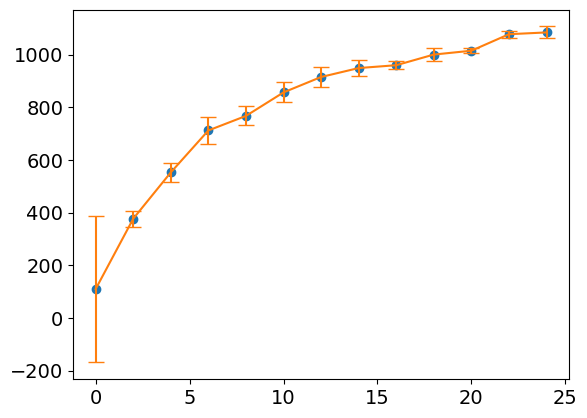

In [14]:

Xtot = np.linspace(0,24,13)
signal = calc_theta(6.1,Xtot,0.1) + np.random.normal(0,0.015,len(Xtot))
signal_err = np.random.normal(0.015,0.01,len(signal))

Sm = 100
Smx = 1200

err_pct = signal_err/signal

signal = signal*Smx + Sm
signal_err = signal*err_pct

plt.plot(Xtot,signal,"o")
plt.errorbar(Xtot,signal,signal_err,capsize=6)

df = pd.DataFrame({"Xtot":Xtot,
                   "Sobs":signal,
                   "Sobs_err":np.abs(signal_err)})


           
#df.to_csv("binding/raw-binding-data.csv",index=False)

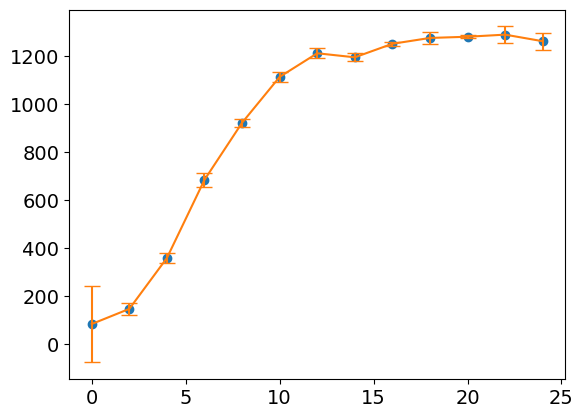

In [27]:

def calc_theta_n(Kd,n,Xtot):
    
    alpha = (Xtot/Kd)**n
    return alpha/(1 + alpha)

Xtot = np.linspace(0,24,13)
signal = calc_theta_n(6.1,3,Xtot) + np.random.normal(0,0.015,len(Xtot))
signal_err = np.random.normal(0.015,0.01,len(signal))

Sm = 100
Smx = 1200

err_pct = signal_err/signal

signal = signal*Smx + Sm
signal_err = signal*err_pct

plt.plot(Xtot,signal,"o")
plt.errorbar(Xtot,signal,signal_err,capsize=6)

df = pd.DataFrame({"Xtot":Xtot,
                   "Sobs":signal,
                   "Sobs_err":np.abs(signal_err)})

#df.to_csv("binding/raw-binding-data_1.csv",index=False)